In [ ]:
# Import Libraries and dataset
import pandas as pd
import numpy as np
import re

# Importing for visulizations
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Importing the warnings
import warnings
warnings.filterwarnings('ignore')


# For NLP & Preprocessing

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from wordcloud import WordCloud,STOPWORDS #Better stopwords here
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
emails=pd.read_csv("/content/drive/MyDrive/data/emails")
emails

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [ ]:
emails.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [ ]:
emails.shape

(48076, 5)

In [ ]:
emails.describe()

,Unnamed: 0
count,48076.000000
mean,24037.500000
std,13878.490108
min,0.000000
25%,12018.750000
50%,24037.500000
75%,36056.250000
max,48075.000000


Data Cleaning

In [ ]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
# drop first 3 columns
emails.drop(columns=['Unnamed: 0','filename','Message-ID'],inplace=True)

In [ ]:
emails.sample(5)

,content,Class
17528,\t[IMAGE]\tNews ? Money ? Entertainment ? Ki...,Non Abusive
43358,1. Only send your timesheet if you have taken ...,Non Abusive
2084,hot damn.\nPL,Abusive
21538,From http://OpinionJournal.com\n\nBest of th...,Non Abusive
4984,This request has been pending your approval fo...,Non Abusive


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
emails['Class']=encoder.fit_transform(emails['Class'])

In [ ]:
emails.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


Here Abusive is labeled as 0 and Non-Abusive is labeled as 1.

In [ ]:
#misssing values
emails.isnull().sum()

content    0
Class      0
dtype: int64

In [ ]:
emails.duplicated().sum()

23420

In [ ]:
emails=emails.drop_duplicates(keep='first')

In [ ]:
emails.duplicated().sum()

0

In [ ]:
emails.shape

(24656, 2)

# EDA

In [ ]:
emails.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [ ]:
emails.tail()

,content,Class
47974,Do you need new leads for your business ?\n D...,1
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",1
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,1
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,1
47981,\nYou received this e-mail because you registe...,1


In [ ]:
emails['Class'].value_counts()

1    23014
0     1642
Name: Class, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

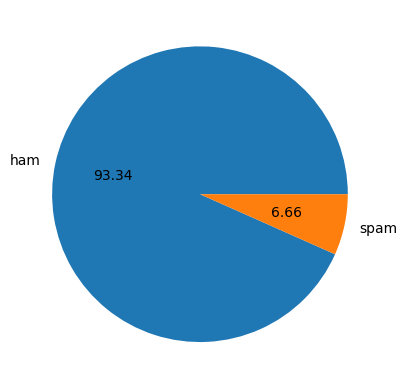

In [ ]:
plt.pie(emails['Class'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show

# Auto EDA

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 36.3 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


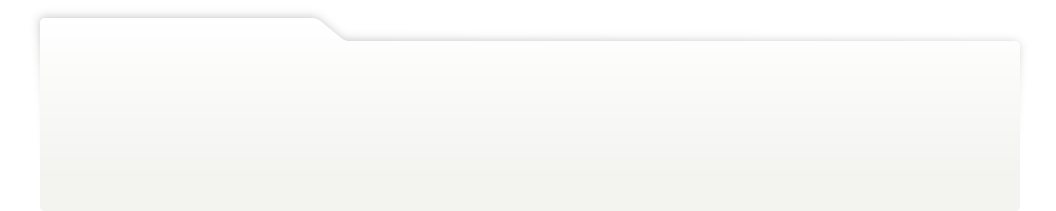
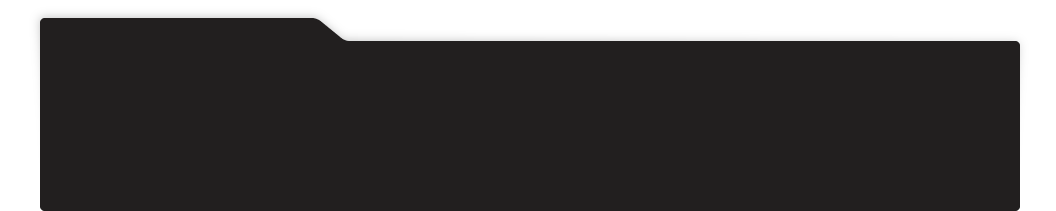
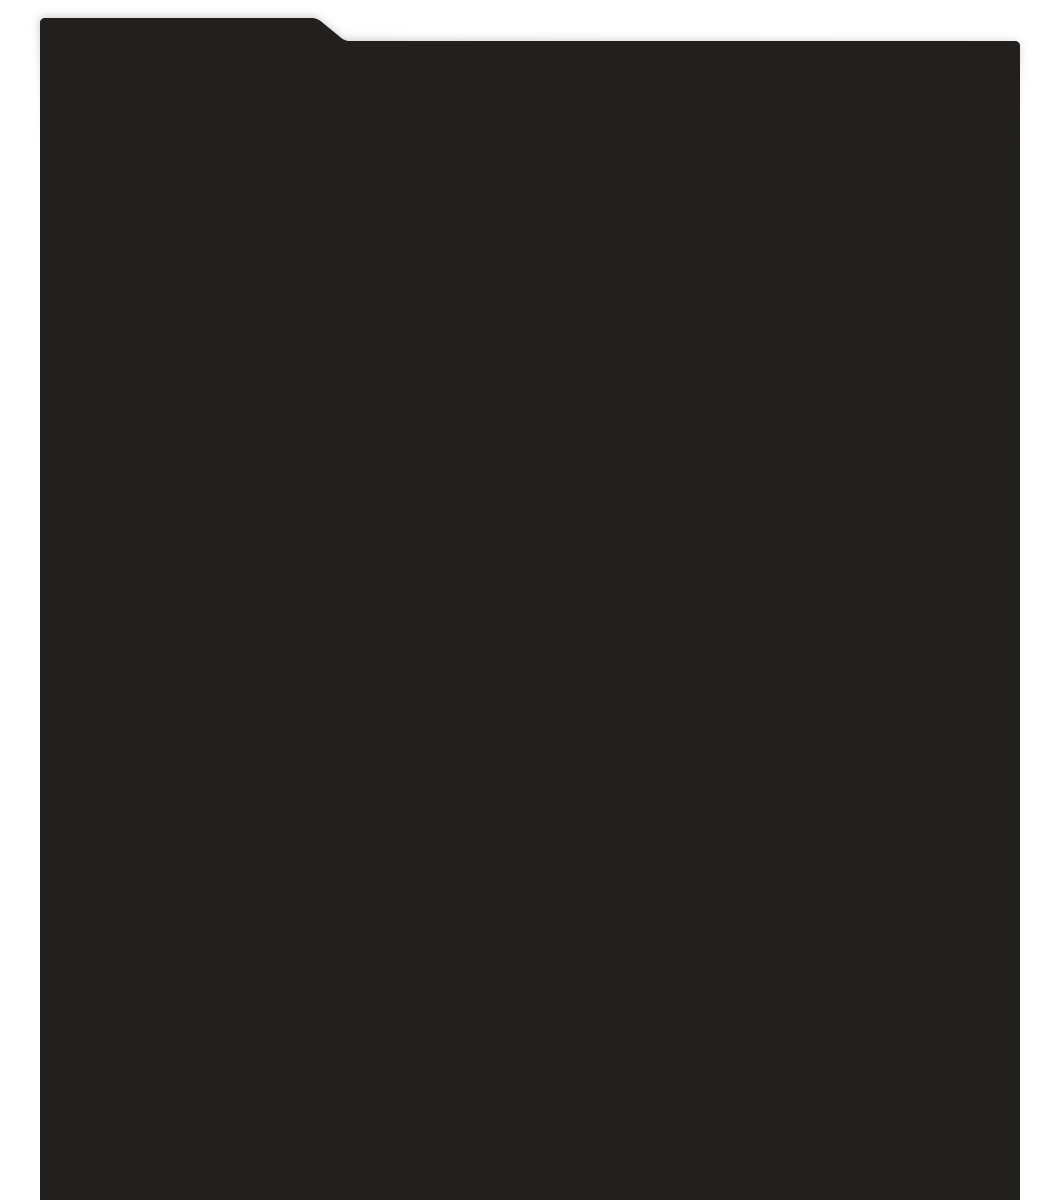
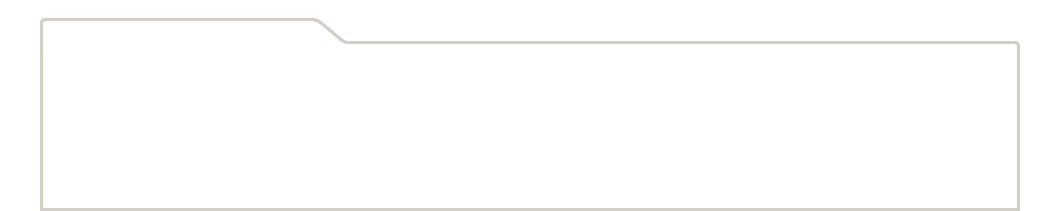
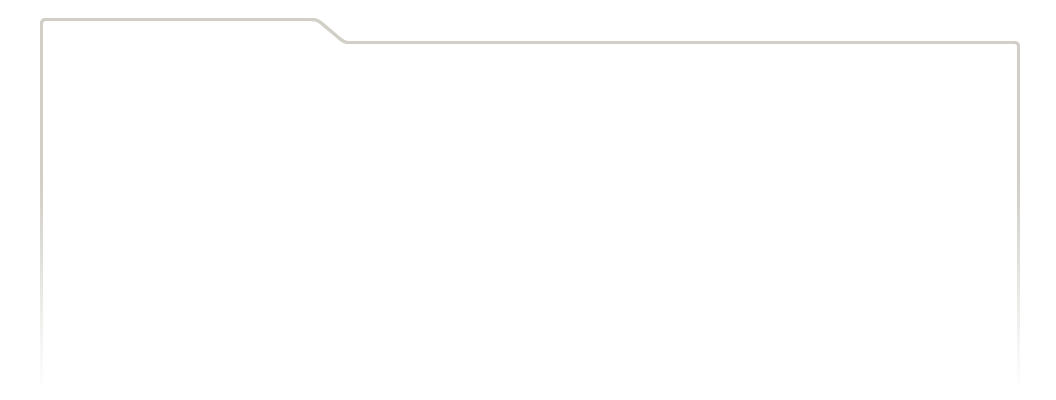
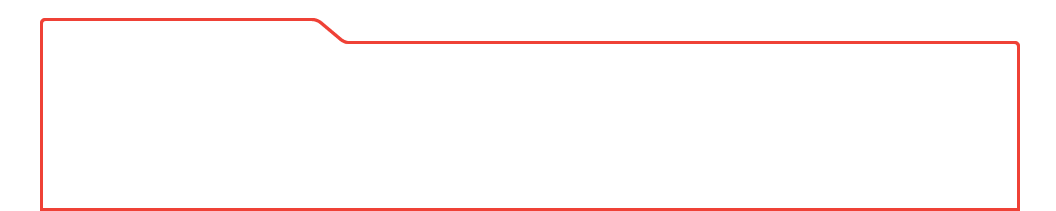
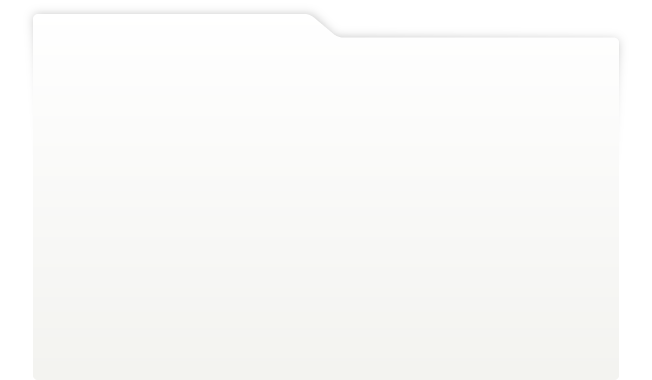
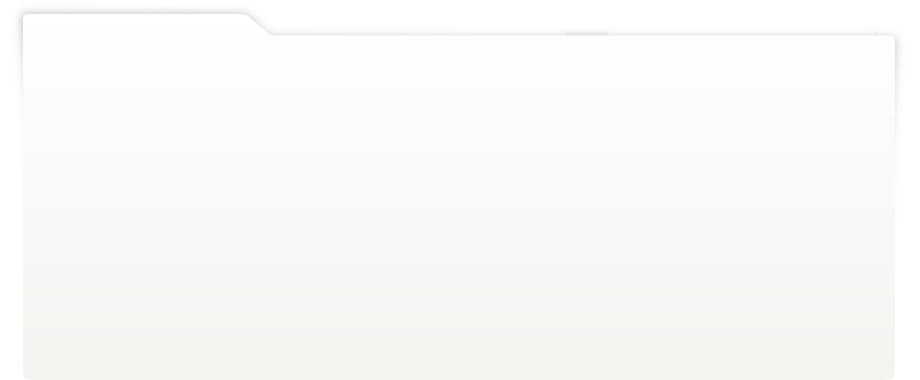
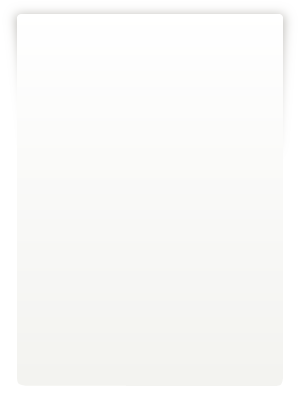
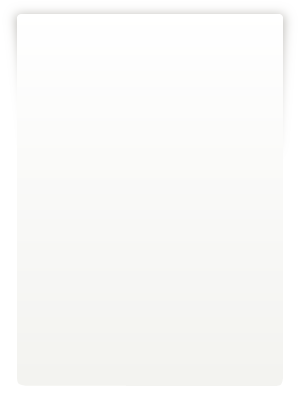
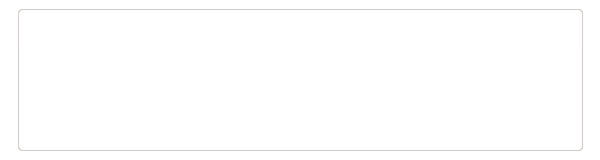
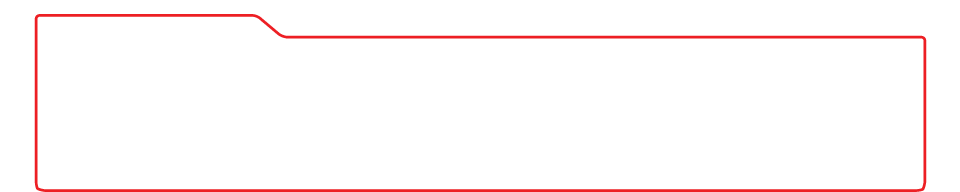
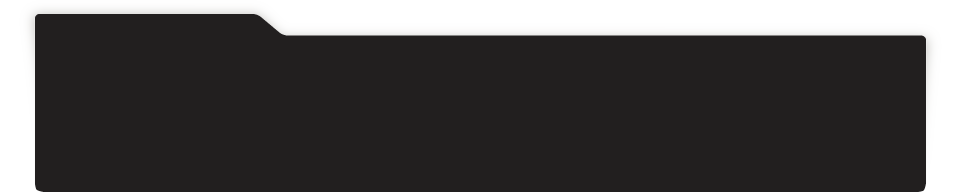
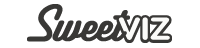
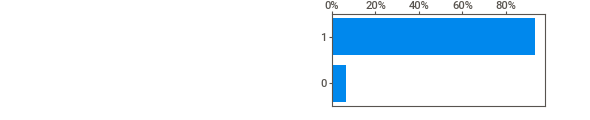
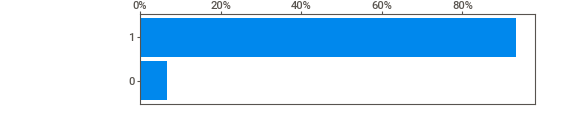
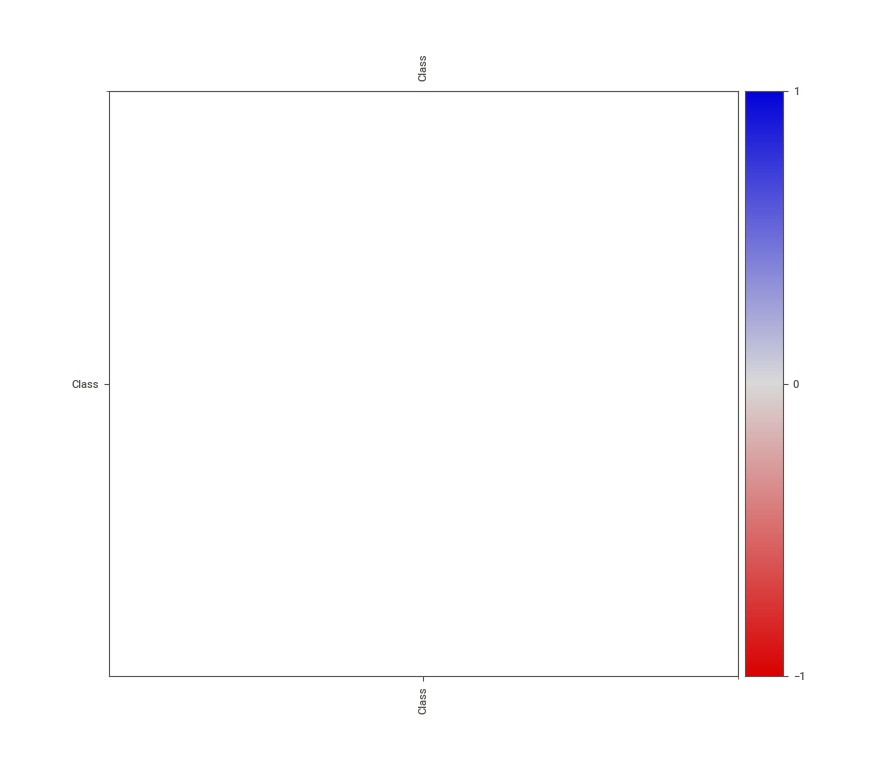
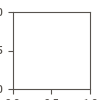

Report emails (1)_SV_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# 2. Using Sweetviz
import sweetviz as sv
sweet_report=sv.analyze(emails)
sweet_report.show_notebook()
sweet_report.show_html('emails (1)_SV_Report.html')

In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
ps=PorterStemmer()

In [ ]:
import string

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
emails['content'].apply(len)

0         220
1           8
2         612
3         505
4         203
         ... 
47974    1523
47975    1126
47977     892
47980     932
47981    4289
Name: content, Length: 24656, dtype: int64

In [ ]:
emails['num_characters']=emails['content'].apply(len)

In [ ]:
emails.head()

,content,Class,num_characters
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [ ]:
# num of words 
emails['content'].apply(lambda x:nltk.word_tokenize(x))

0        [eat, shit, John, J, Lavorato, @, excelr, 11/1...
1                                              [fuck, you]
2        [Gentlemen, :, The, following, champagne, is, ...
3        [sorry, i, 've, taken, so, long, ..., just, be...
4        [asshole, John, J, Lavorato, @, excelr, 12/23/...
                               ...                        
47974    [Do, you, need, new, leads, for, your, busines...
47975    [[, IMAGE, ], [, IMAGE, ], [, IMAGE, ], GARTH,...
47977    [[, IMAGE, ], [, IMAGE, ], [, IMAGE, ], Dear, ...
47980    [[, IMAGE, ], [, IMAGE, ], [, IMAGE, ], [, IMA...
47981    [You, received, this, e-mail, because, you, re...
Name: content, Length: 24656, dtype: object

In [ ]:
emails['content'].apply(lambda x:len(nltk.word_tokenize(x)))

0         44
1          2
2         99
3        163
4         42
        ... 
47974    255
47975    244
47977    164
47980    189
47981    897
Name: content, Length: 24656, dtype: int64

In [ ]:
emails['num_words']=emails['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
emails.head()

,content,Class,num_characters,num_words
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [ ]:
emails['num_sentences']=emails['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
# num of words 
emails['content'].apply(lambda x:nltk.word_tokenize(x))

0        [eat, shit, John, J, Lavorato, @, excelr, 11/1...
1                                              [fuck, you]
2        [Gentlemen, :, The, following, champagne, is, ...
3        [sorry, i, 've, taken, so, long, ..., just, be...
4        [asshole, John, J, Lavorato, @, excelr, 12/23/...
                               ...                        
47974    [Do, you, need, new, leads, for, your, busines...
47975    [[, IMAGE, ], [, IMAGE, ], [, IMAGE, ], GARTH,...
47977    [[, IMAGE, ], [, IMAGE, ], [, IMAGE, ], Dear, ...
47980    [[, IMAGE, ], [, IMAGE, ], [, IMAGE, ], [, IMA...
47981    [You, received, this, e-mail, because, you, re...
Name: content, Length: 24656, dtype: object

In [ ]:
emails['content'].apply(lambda x:len(nltk.word_tokenize(x)))

0         44
1          2
2         99
3        163
4         42
        ... 
47974    255
47975    244
47977    164
47980    189
47981    897
Name: content, Length: 24656, dtype: int64

In [ ]:
emails['num_words']=emails['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
emails.head()

,content,Class,num_characters,num_words,num_sentences
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,9
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [ ]:
emails['num_sentences']=emails['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
emails.head()

,content,Class,num_characters,num_words,num_sentences
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,9
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [ ]:
emails[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.358615,12.612021
std,5394.644531,818.397111,27.093586
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32337.000000,1088.000000


In [ ]:
emails[emails['Class']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.699147,17.174787
std,2834.633786,590.604423,33.633785
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,451.000000


In [ ]:
emails[emails['Class']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.191622,12.286478
std,5532.160062,832.279638,26.536423
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32337.000000,1088.000000


In [ ]:
print(emails.columns)

Index(['content', 'Class', 'num_characters', 'num_words', 'num_sentences'], dtype='object')


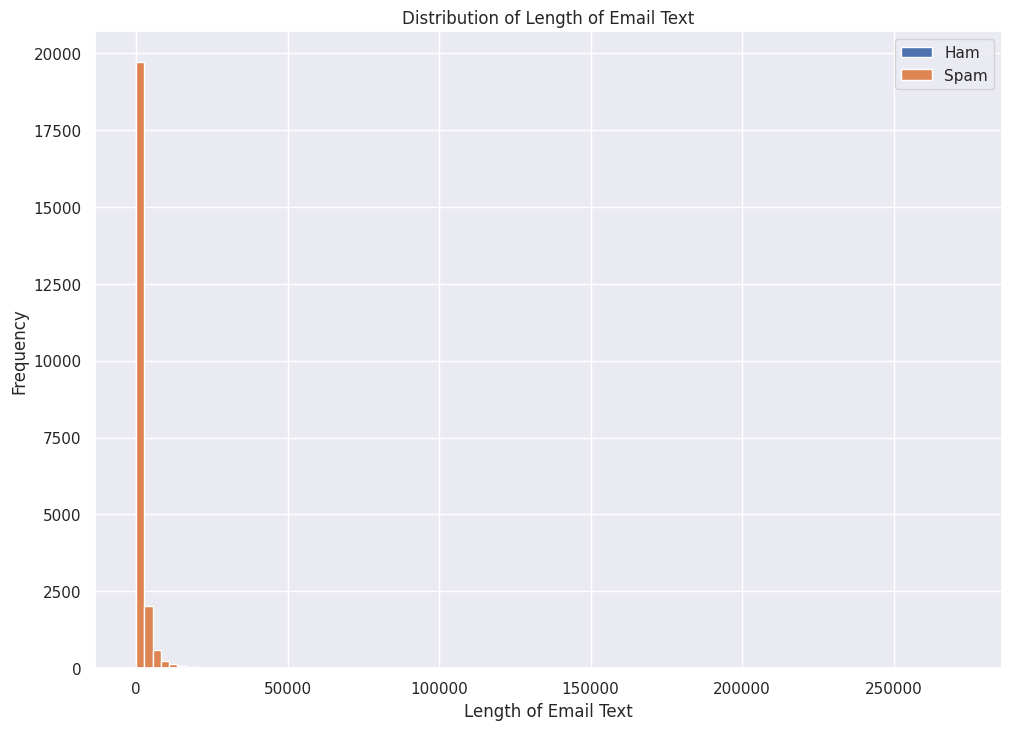

In [ ]:
#emails['length'].plot(bins=100, kind='hist') 
#Length of characters for ham emails is more as compared to spam emails
sns.set(rc={'figure.figsize':(11.7,8.27)})
ham_messages_length =  emails[emails['Class']==0] 
spam_messages_length =  emails[emails['Class']==1]

ham_messages_length['num_characters'].plot(bins=100, kind='hist',label = 'Ham') 
spam_messages_length['num_characters'].plot(bins=100, kind='hist',label = 'Spam') 
#sns.distplot(ham_messages_length['length'], bins=10, norm_hist = True, label = 'Ham')
#sns.distplot(spam_messages_length['length'], bins=10, norm_hist = True, label = 'Spam')
plt.title('Distribution of Length of Email Text')
plt.xlabel('Length of Email Text')
plt.legend()


#ax = sns.distplot(ham_words_length, norm_hist = True, bins = 30, label = 'Ham')
#ax = sns.distplot(spam_words_length, norm_hist = True, bins = 30, label = 'Spam')

#plt.legend()
#plt.title('Distribution of Number of Words')
#plt.xlabel('Number of Words')
#plt.show()

<Axes: xlabel='num_characters', ylabel='Count'>

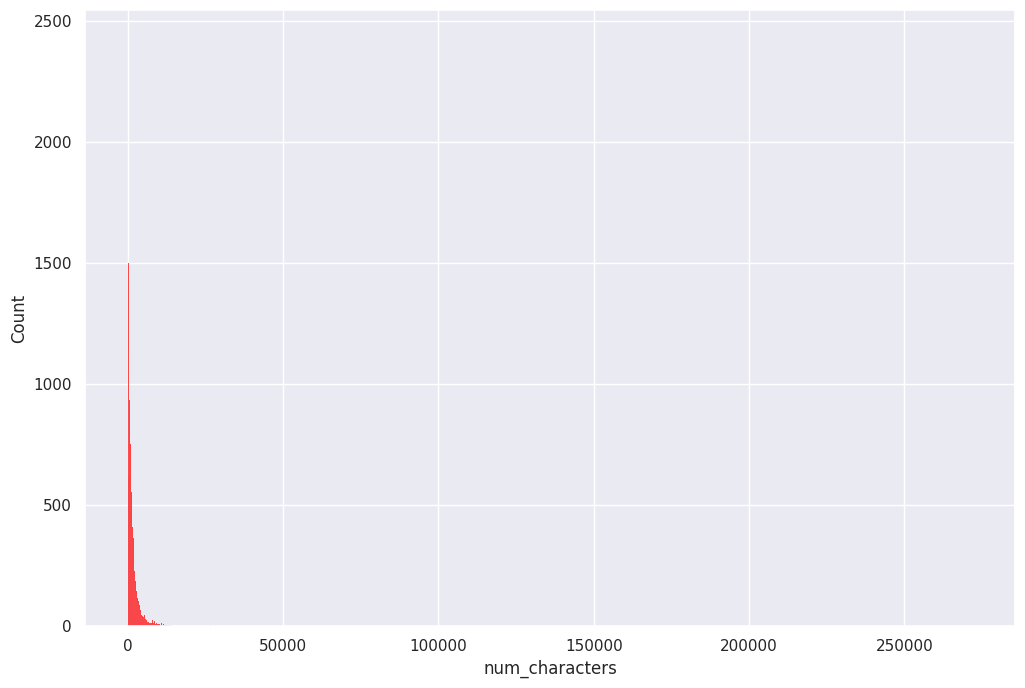

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(emails[emails['Class']==0]['num_characters'],color='blue')
sns.histplot(emails[emails['Class']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

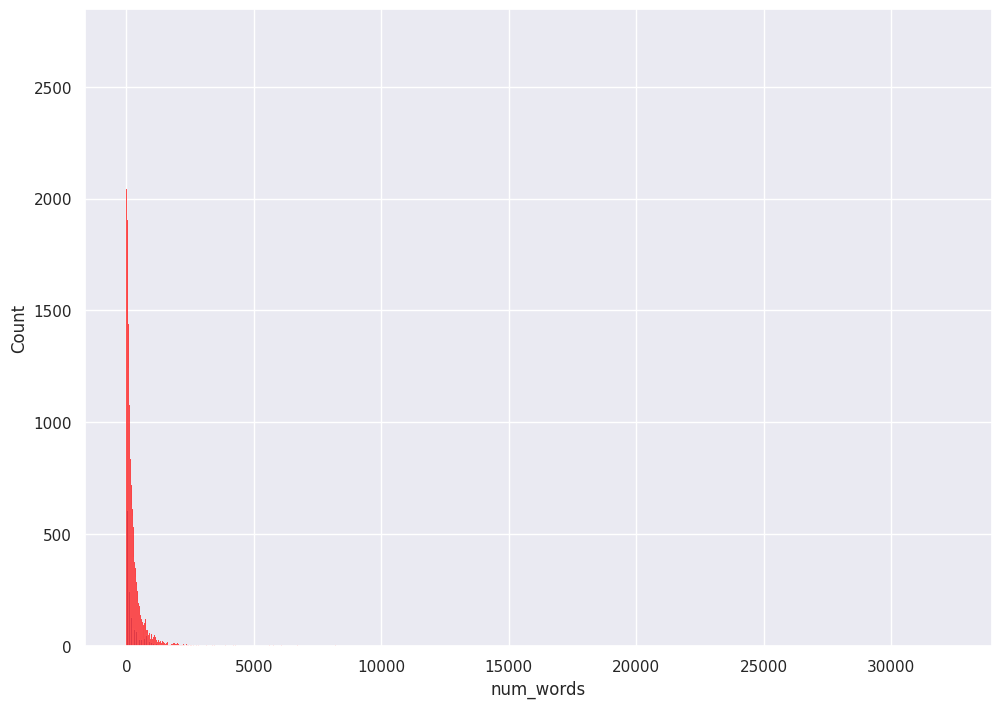

In [ ]:
sns.histplot(emails[emails['Class']==0]['num_words'])
sns.histplot(emails[emails['Class']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

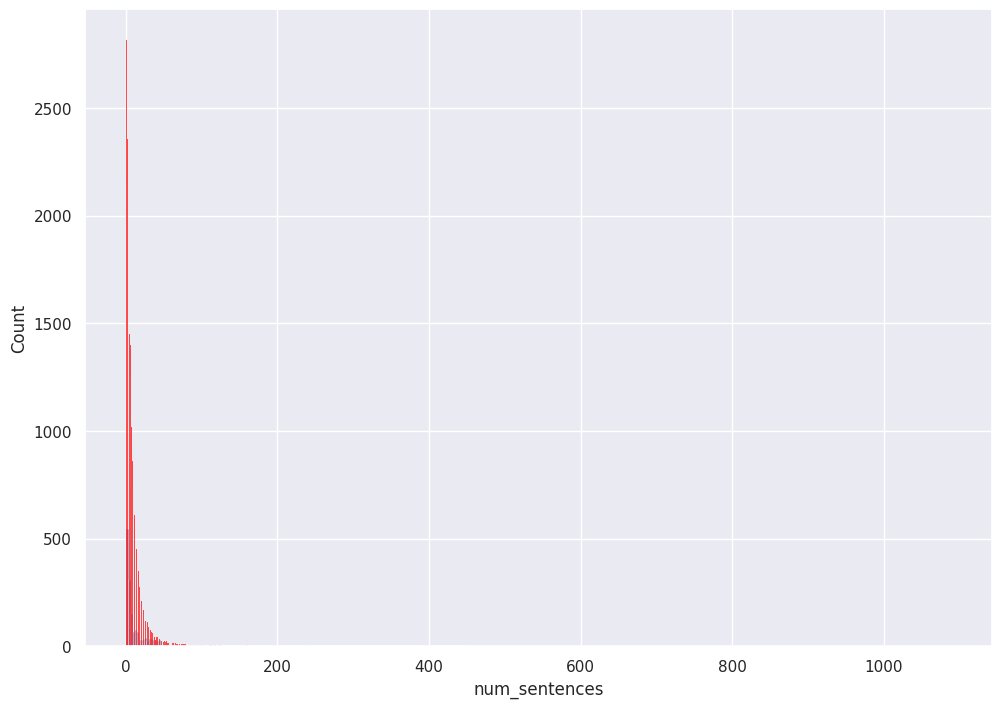

In [ ]:
sns.histplot(emails[emails['Class']==0]['num_sentences'])
sns.histplot(emails[emails['Class']==1]['num_sentences'],color='red')

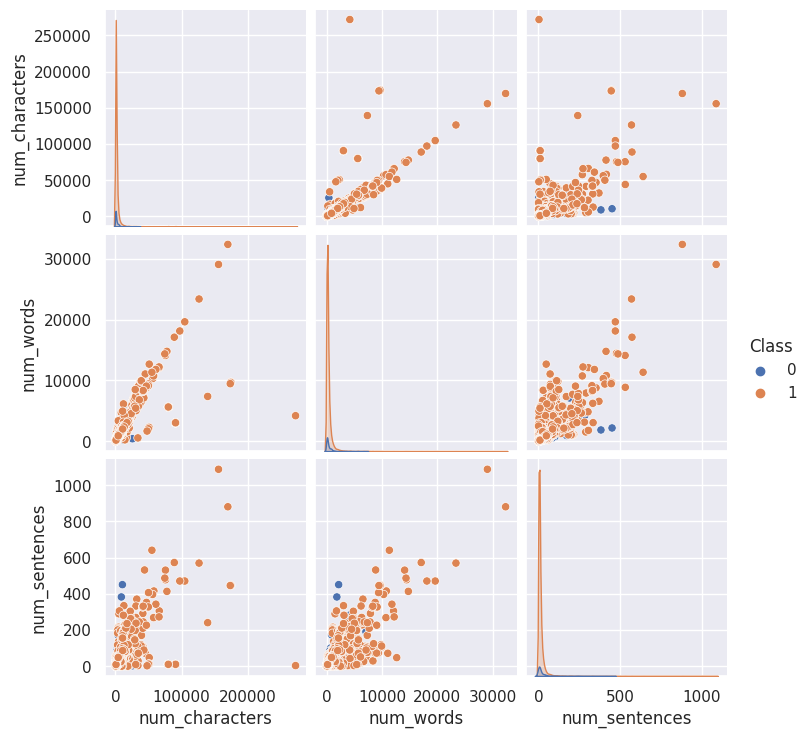

In [ ]:
sns.pairplot(emails,hue='Class')

<Axes: >

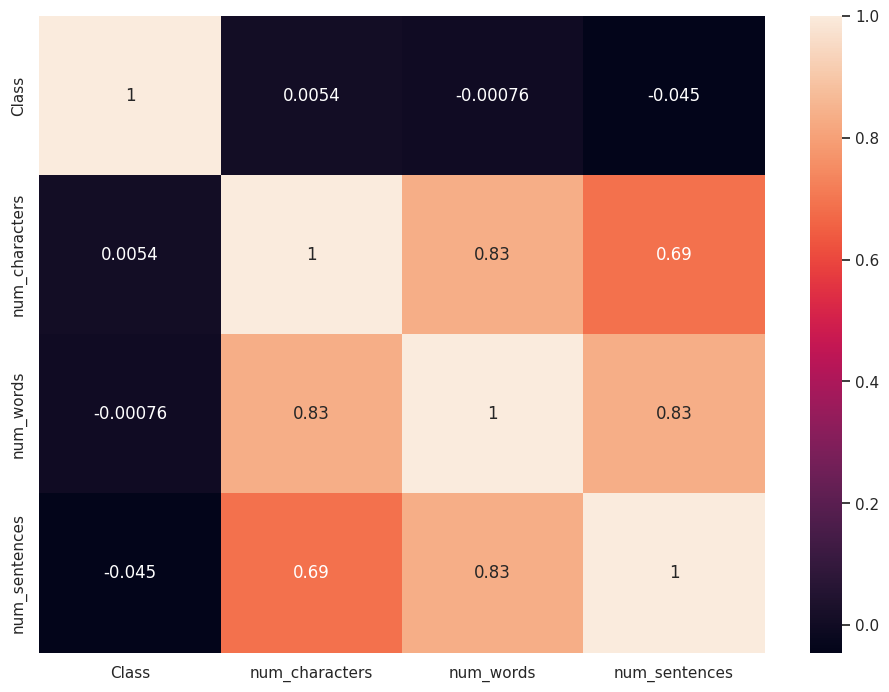

In [ ]:
sns.heatmap(emails.corr(),annot =True)

# Data Cleaning

In [ ]:
import re # regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text=text.lower()
    text=re.sub('\[.*?\]',' ',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),' ',text)
    text=re.sub('\w*\d\w*',' ',text)
    text=re.sub('[0-9' ']+',' ',text)
    text=re.sub('[''""…]', ' ', text)
    text=re.sub('[\n]', ' ', text)
    text=re.sub('[\s]', ' ', text)
    return text

clean = lambda x: clean_text(x)

In [ ]:
emails['content']=emails['content'].apply(clean)
emails['content']

0        eat shit     john j lavorato excelr           ...
1                                                 fuck you
2        gentlemen  the following champagne is availabl...
3        sorry i ve taken so long   just been trying to...
4        asshole     john j lavorato excelr           a...
                               ...                        
47974     do you need new leads for your business    do...
47975                garth brooks   wrapped up in you  ...
47977          dear smartreminders member             f...
47980                    kid rock   forever         off...
47981     you received this e mail because you register...
Name: content, Length: 24656, dtype: object

In [ ]:
# Word frequency before applying Stopwords
freq=pd.Series(' '.join(emails['content']).split()).value_counts()[:20] # for top 20
freq

the       230517
to        171292
and       111856
a         101063
of         92258
in         73040
for        66071
you        64184
com        62155
excelr     62143
i          57309
on         53719
is         52470
s          48348
that       44577
this       42646
ect        40008
from       37646
be         37133
with       34723
dtype: int64

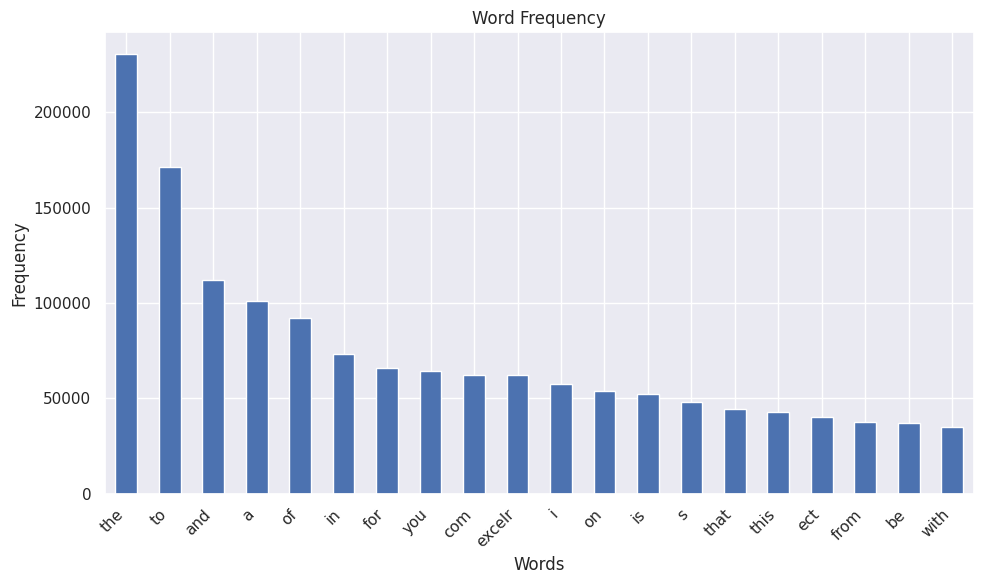

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a Series with the word frequencies
freq = pd.Series({
    'the': 230517,
    'to': 171292,
    'and': 111856,
    'a': 101063,
    'of': 92258,
    'in': 73040,
    'for': 66071,
    'you': 64184,
    'com': 62155,
    'excelr': 62143,
    'i': 57309,
    'on': 53719,
    'is': 52470,
    's': 48348,
    'that': 44577,
    'this': 42646,
    'ect': 40008,
    'from': 37646,
    'be': 37133,
    'with': 34723
})

# Create a bar plot for word frequency
plt.figure(figsize=(10, 6))
freq.plot(kind='bar')

# Set custom x-axis tick labels
xtick_labels = freq.index.tolist()
plt.xticks(range(len(freq)), xtick_labels, rotation=45, ha='right')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.tight_layout()
plt.show()


In [ ]:
#Removing Stopwords
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['excelr', 'ect', 'com', 'hou', 'cc', 'td', 'http', 'www', 'font', 'original', 'message','subject', 'fw'])

emails['content'] = emails['content'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))
emails['content']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        eat shit john j lavorato pm john arnold footba...
1                                                     fuck
2        gentlemen following champagne available approx...
3        sorry taken long trying fend chicks life soooo...
4        asshole john j lavorato john arnold john cant ...
                               ...                        
47974    need new leads business need increased interne...
47975    garth brooks wrapped win tickets trip garth br...
47977    dear smartreminders member franchoice free one...
47980    kid rock forever official kid rock site kidroc...
47981    received e mail registered e trade web site on...
Name: content, Length: 24656, dtype: object

In [ ]:
# word frequency after removal of stopwords
freq_nsw=pd.Series(' '.join(emails['content']).split()).value_counts()[:20] # for top 20
freq_nsw

please    17048
e         15998
pm        14863
time      13331
b         12998
would     12848
new       12458
sent      11776
one       11030
size      10810
br        10650
get       10115
may        9825
align      9778
week       9718
mail       9692
know       9437
corp       8814
tr         8808
thanks     8698
dtype: int64

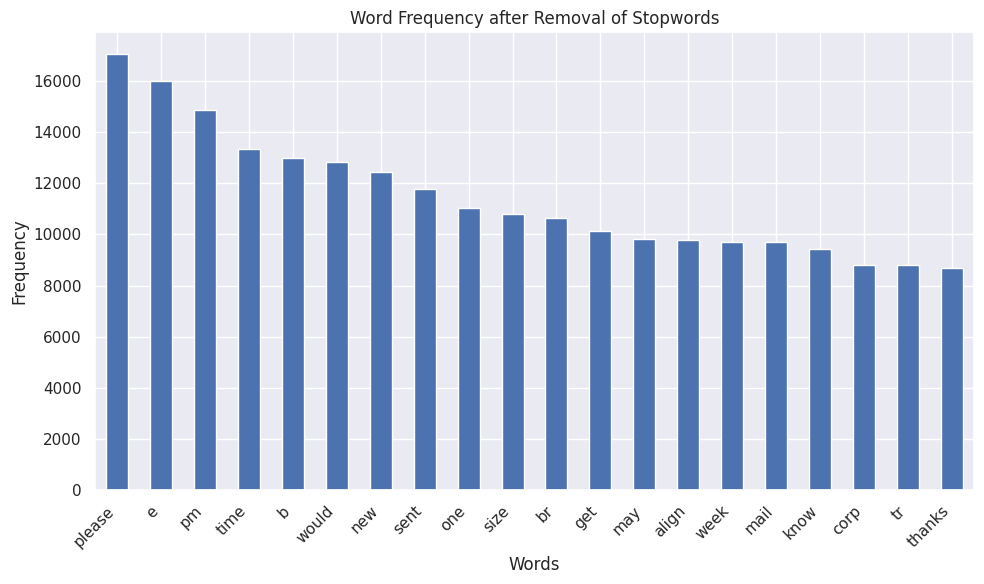

In [ ]:
# Compute word frequency after removal of stopwords
freq_nsw = pd.Series(' '.join(emails['content']).split()).value_counts()[:20]

# Create a bar plot for word frequency
plt.figure(figsize=(10, 6))
freq_nsw.plot(kind='bar')

# Set custom x-axis tick labels
xtick_labels = freq_nsw.index.tolist()
plt.xticks(range(len(freq_nsw)), xtick_labels, rotation=45, ha='right')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency after Removal of Stopwords')
plt.tight_layout()
plt.show()


# Feature Extraction

# 1. count vectoriser (tells the frequency of a word)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
vectorizer=CountVectorizer(min_df=1,max_df=5)  # df = data frequency
X=vectorizer.fit_transform(emails['content'])
word_freq_df=pd.DataFrame({'term':vectorizer.get_feature_names_out(),'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency']=word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [ ]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,0.000007
1,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,0.000007
2,aaaaaaaaaaaaaaaaaaaaaaaaaaaaafhzwiaaaaaaaadzuq...,1,0.000007
3,aaaaaaaaaaaaaaaaaaaaahzpzxcaaaaaabok,1,0.000007
4,aaaaaaaaaaaawflaiaaaaaaaag,1,0.000007
5,aaaaaabwaad,4,0.000027
6,aaaaaewjvgbqaaaavx,1,0.000007
7,aaaabrtzwfz,1,0.000007
8,aaabbqebaqebaqaaaaaaaaadaaec,1,0.000007
9,aaagbagabbqa,1,0.000007


# 2.TFIDF (Term Frequency Inverse Document Frequency) Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english',max_features=500,max_df=1,smooth_idf=True) # keep top 500 words
doc_vec=vectorizer.fit_transform(emails['content'])
feature_names=vectorizer.get_feature_names_out()
dense=doc_vec.todense()  # todense returns a matrix
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [ ]:
df

,abramoff,acegas,actarray,activitated,advantium,aeb,aefa,afterholiem,aftertax,afudc,...,yfti,yiddish,yil,yourman,youwintrivia,zeroue,zonealarm,zoomerang,zpro,zubeida
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. N-Gram

In [ ]:
# Bi-gram

def get_top_n2_words(corpus,n=None):
    vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
    word_freq=sorted(word_freq, key=lambda x: x[1],reverse=True)
    return word_freq[:n]

In [ ]:
top2_words=get_top_n2_words(emails['content'],n=200) # top 200
top2_df=pd.DataFrame(top2_words)
top2_df.columns=['Bi-grams','Freq']
top2_df.head(50)

,Bi-grams,Freq
0,align right,5423
1,let know,4286
2,class align,3988
3,face arial,3962
4,fantasy sportsline,3775
5,sportsline mp,3651
6,arial helvetica,3551
7,br br,3473
8,mp elink,3416
9,owner random,3414


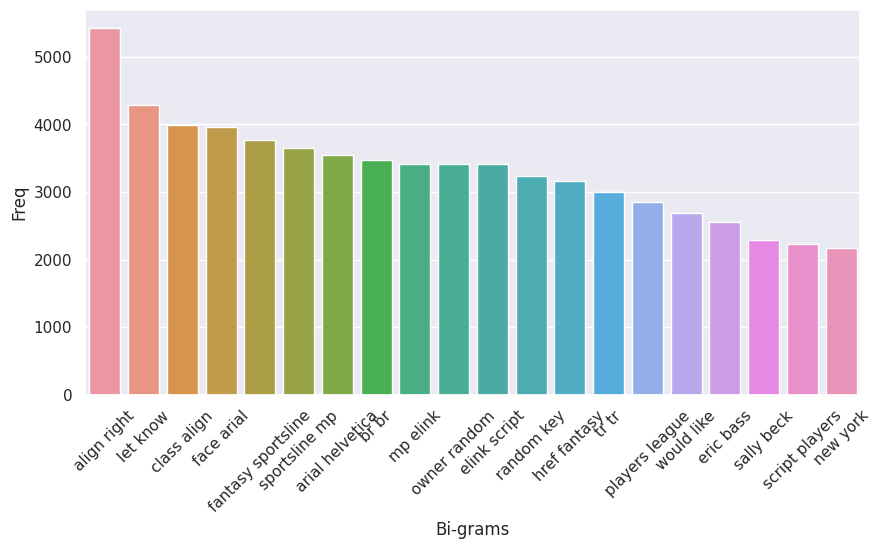

In [ ]:
# Bi-gram plot

import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(10,5))
plot=sns.barplot(x=top20_bigram['Bi-grams'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram['Bi-grams'])
plt.show()

In [ ]:
# Tri-gram

def get_top_n3_words(corpus,n=None):
    vec1=CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
    word_freq=sorted(word_freq, key=lambda x: x[1],reverse=True)
    return word_freq[:n]

In [ ]:
top3_words=get_top_n3_words(emails['content'],n=200)
top3_df=pd.DataFrame(top3_words)
top3_df.columns=['Tri-grams','Freq']

In [ ]:
top3_df.head(50)

,Tri-grams,Freq
0,fantasy sportsline mp,3648
1,mp elink script,3414
2,sportsline mp elink,3409
3,owner random key,3235
4,face arial helvetica,3210
5,href fantasy sportsline,3165
6,class align right,2810
7,elink script players,2232
8,script players league,2230
9,arial helvetica size,1933


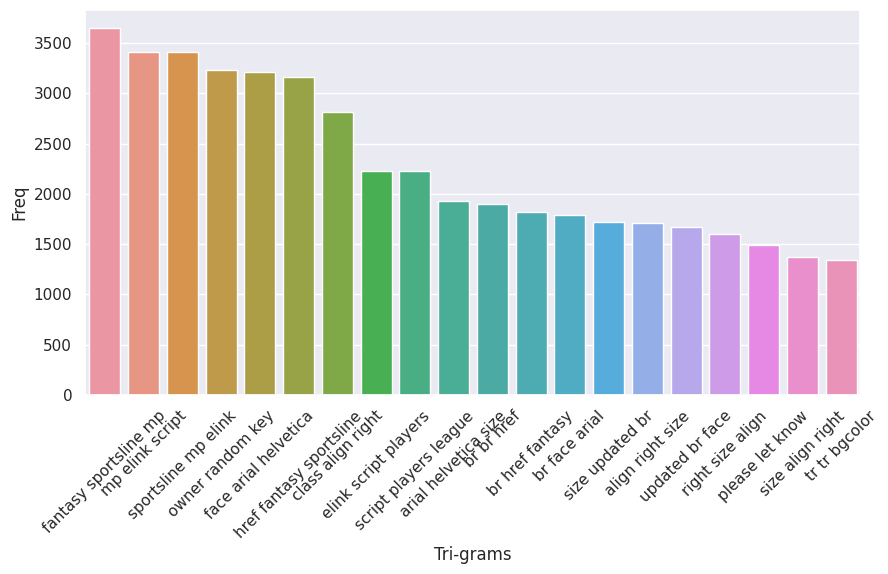

In [ ]:
# Tri-gram plot

top20_trigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(10,5))
plot=sns.barplot(x=top20_trigram['Tri-grams'],y=top20_trigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_trigram['Tri-grams'])
plt.show()

# Word Cloud

(-0.5, 799.5, 399.5, -0.5)

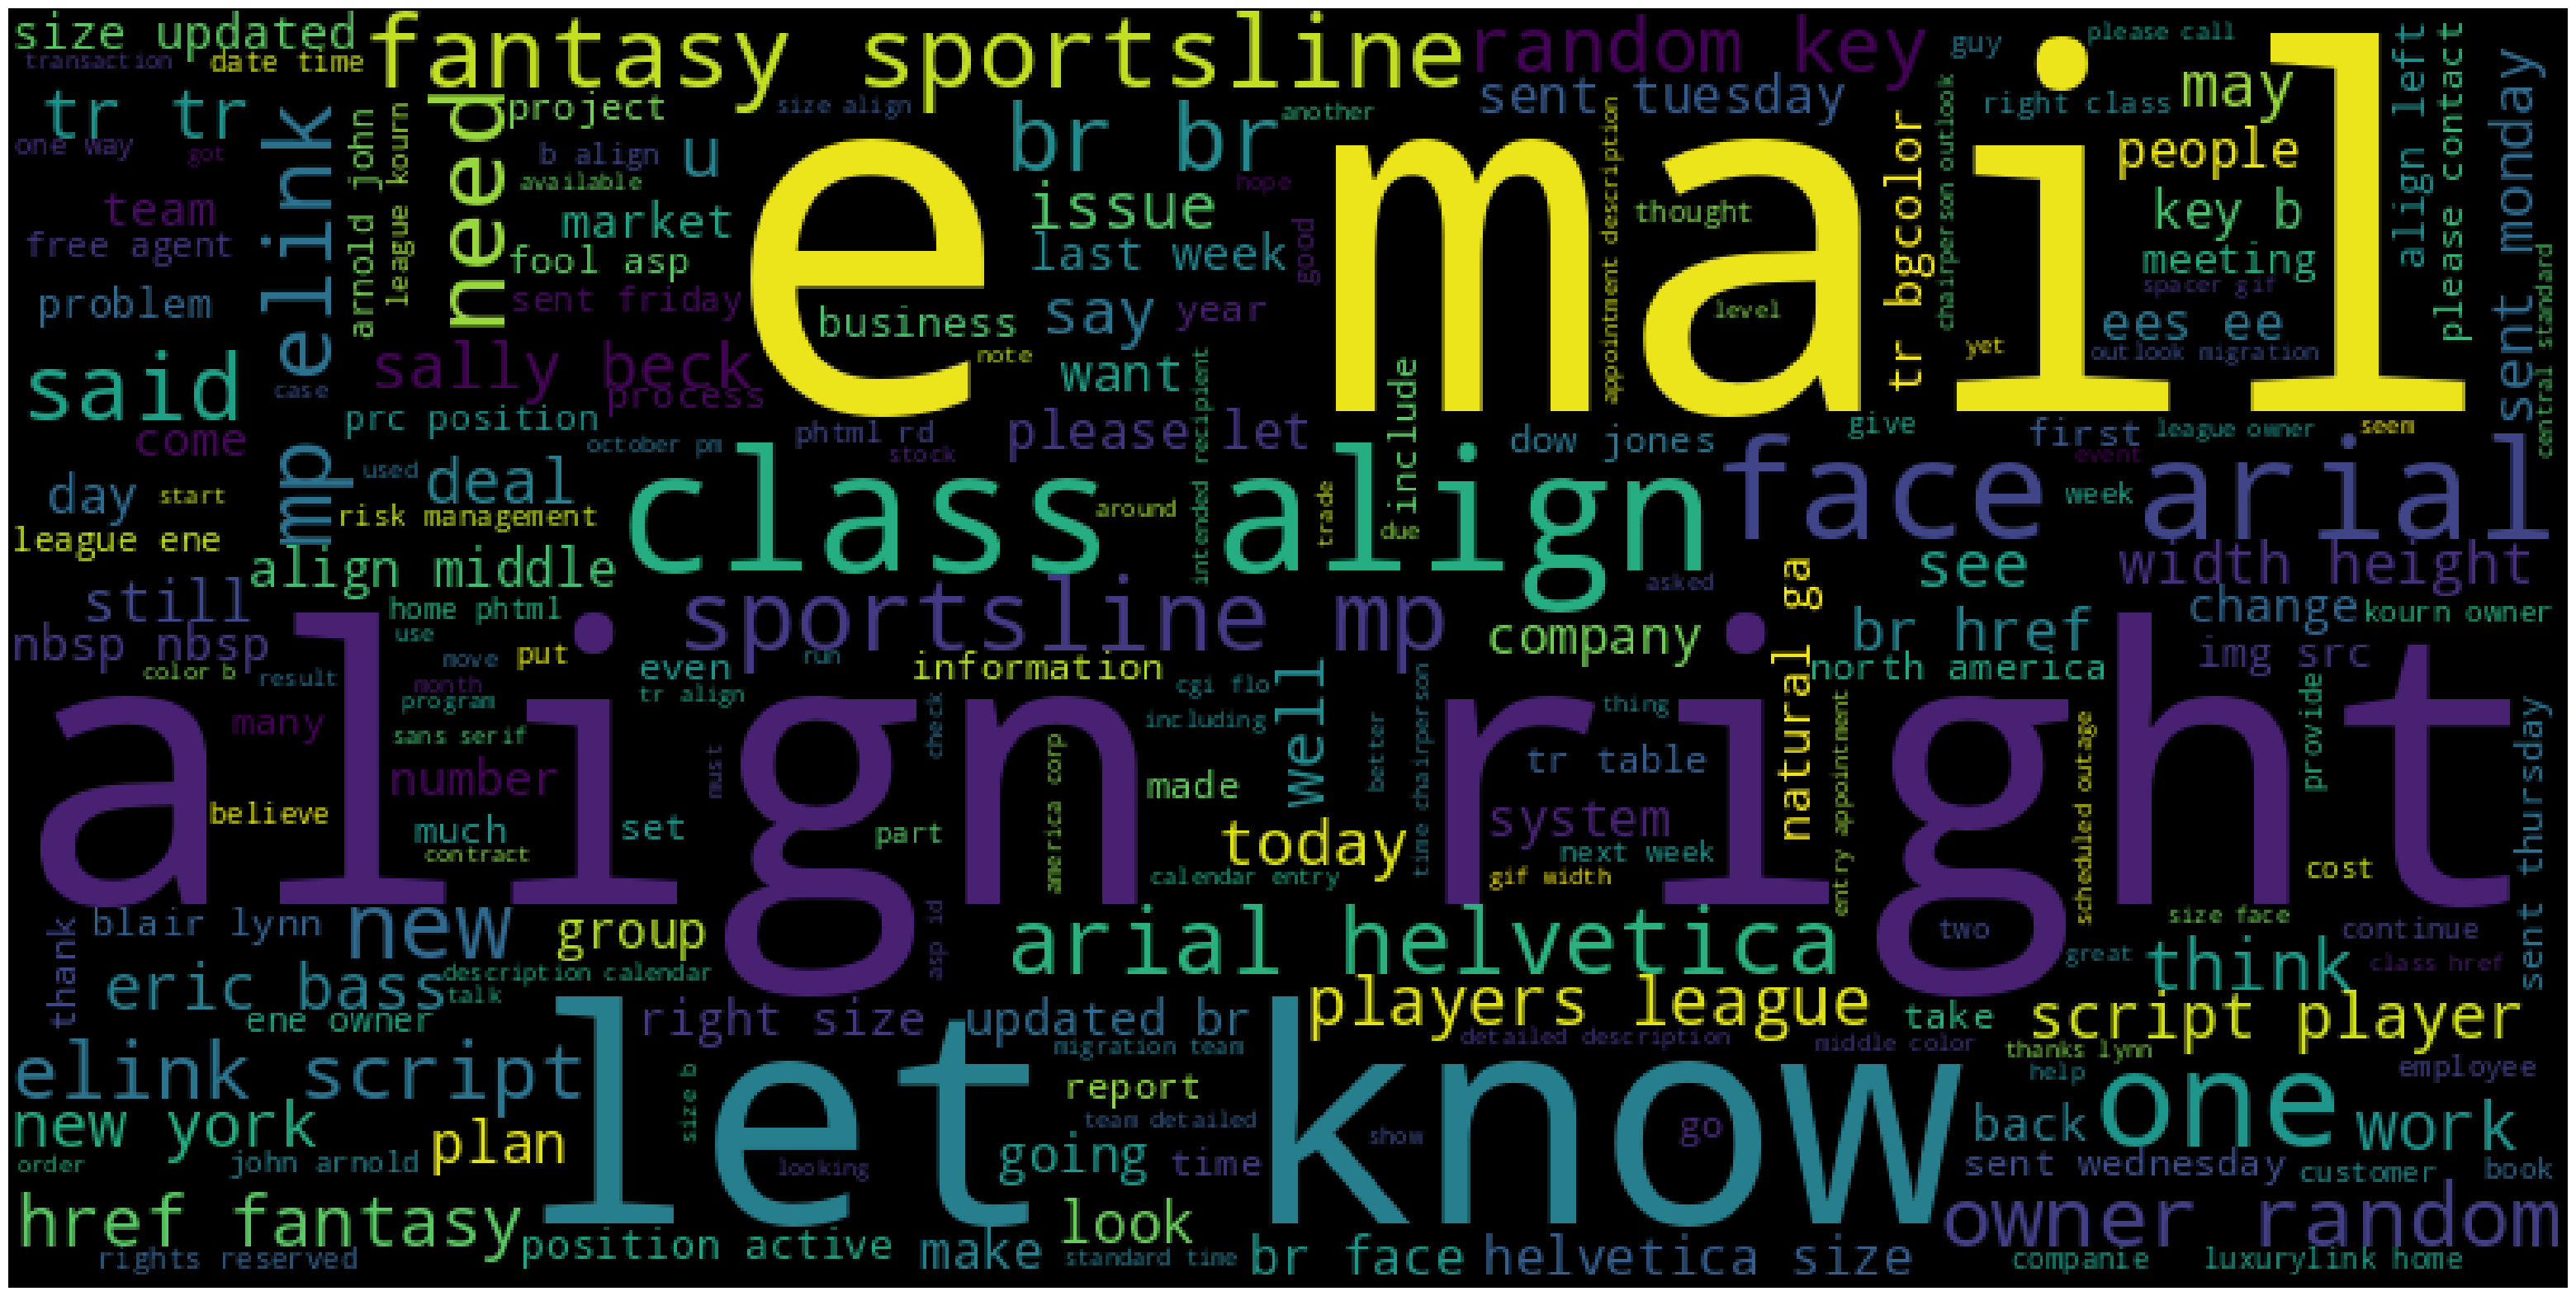

In [ ]:
# wordcloud for entire corpus

from wordcloud import WordCloud

string_total=' '.join(emails['content'])

wordcloud_str=WordCloud(background_color='black',width=800,height=400,).generate(string_total)

plt.figure(figsize=(40,30))
plt.imshow(wordcloud_str)
plt.axis('off')

# Data PreProcessing

In [ ]:
emails

,content,Class,num_characters,num_words,num_sentences
0,eat shit john j lavorato pm john arnold footba...,0,220,44,1
1,fuck,0,8,2,1
2,gentlemen following champagne available approx...,0,612,99,6
3,sorry taken long trying fend chicks life soooo...,0,505,163,9
4,asshole john j lavorato john arnold john cant ...,0,203,42,2
...,...,...,...,...,...
47974,need new leads business need increased interne...,1,1523,255,12
47975,garth brooks wrapped win tickets trip garth br...,1,1126,244,12
47977,dear smartreminders member franchoice free one...,1,892,164,9
47980,kid rock forever official kid rock site kidroc...,1,932,189,10


# BOW word_count_matrix

In [ ]:
def split_into_words(i):
    return (i.split(' '))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Preparing email texts into bow word count matrix format 
email_bow=CountVectorizer(analyzer=split_into_words).fit(emails.content)

In [ ]:
# For understanding purpose; the o/p looks like this for egs:

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0
 
#  1          1        0        0       1       1    


In [ ]:
# For all messages
all_emails_matrix=email_bow.transform(emails.content)
all_emails_matrix.shape

(24656, 85984)

# TFIDF tokenizer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer=TfidfTransformer().fit(all_emails_matrix)

In [ ]:
# Preparing TFIDF for all emails
all_emails_tfidf=tfidf_transformer.transform(all_emails_matrix)
all_emails_tfidf.shape

(24656, 85984)

# Label Encoding Class

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels

le = preprocessing.LabelEncoder()
  
emails['Class']= le.fit_transform(emails['Class']) 

emails['Class'].value_counts()

1    23014
0     1642
Name: Class, dtype: int64

#Model Building

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(all_emails_tfidf,emails['Class'],test_size=0.3,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17259, 85984), (7397, 85984), (17259,), (7397,))

# Data Balancing

In [ ]:
 # 1. Oversampling

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)

# transform the dataset
x_train_os,y_train_os=oversample.fit_resample(x_train,y_train)

In [ ]:
x_train_os.shape,y_train_os.shape

((32190, 85984), (32190,))

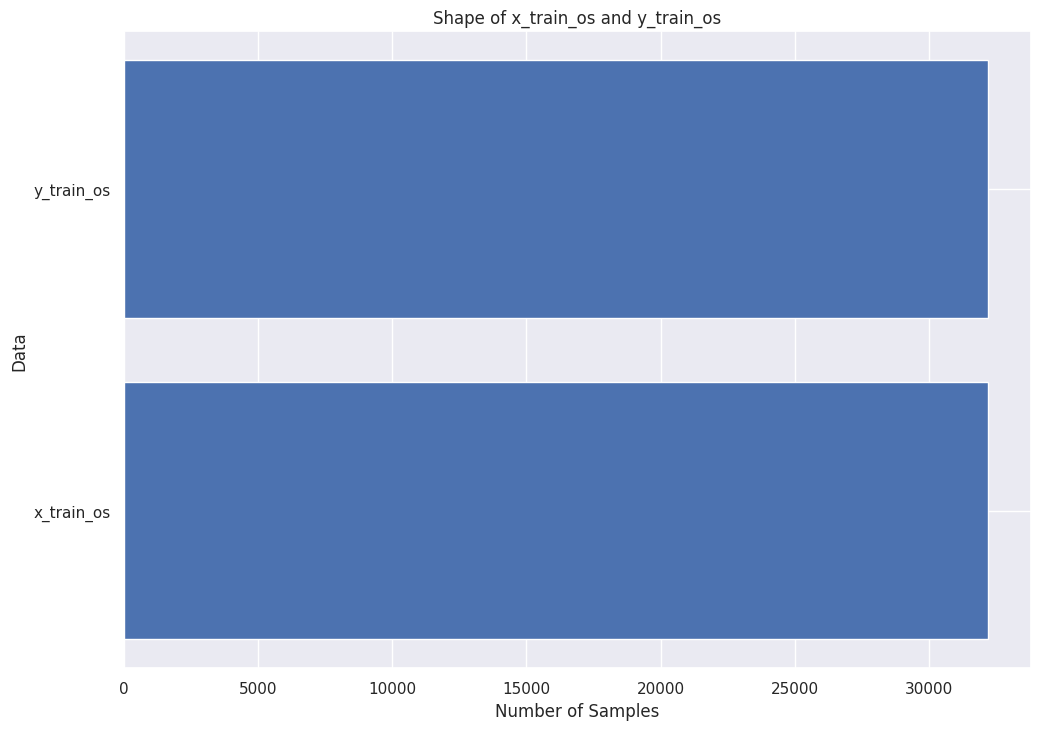

In [ ]:
import matplotlib.pyplot as plt

# Create the data
x_train_os_shape = x_train_os.shape
y_train_os_shape = y_train_os.shape

# Define the labels and values for the horizontal bar plot
labels = ['x_train_os', 'y_train_os']
values = [x_train_os_shape[0], y_train_os_shape[0]]

# Create the horizontal bar plot
plt.barh(labels, values)
plt.xlabel('Number of Samples')
plt.ylabel('Data')
plt.title('Shape of x_train_os and y_train_os')

# Display the plot
plt.show()


In [ ]:
# 2. Undersampling

from imblearn.under_sampling import RandomUnderSampler
undersample=RandomUnderSampler(random_state=42)

# transform the dataset
x_train_s,y_train_s=undersample.fit_resample(x_train_os,y_train_os)

In [ ]:
x_train_s.shape,y_train_s.shape

((32190, 85984), (32190,))

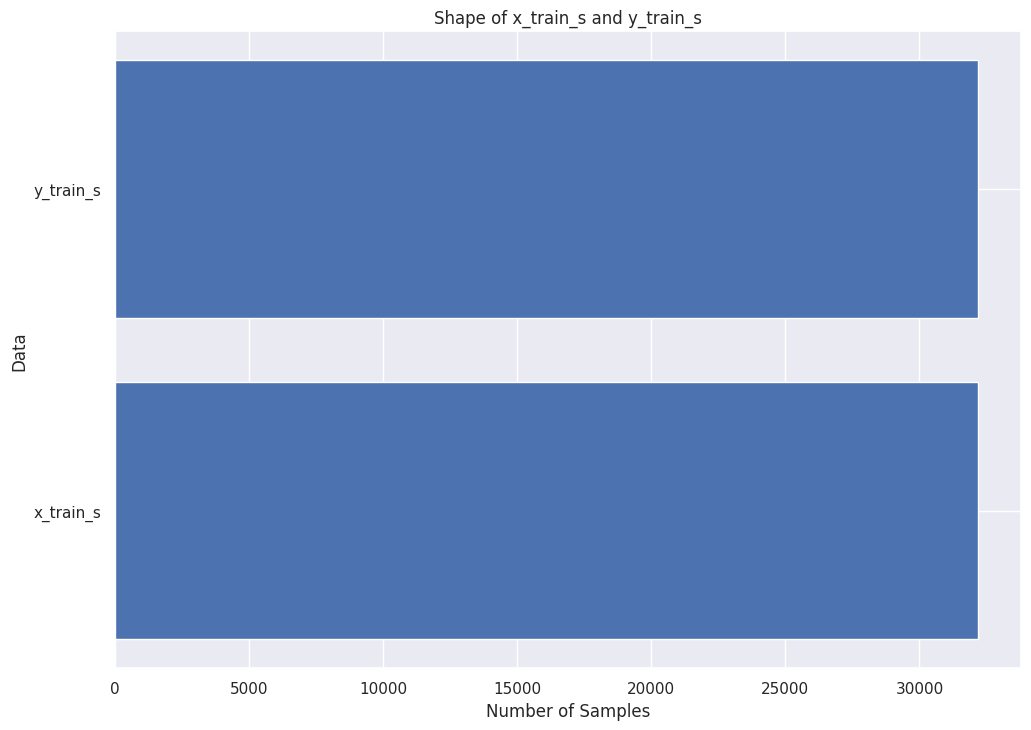

In [ ]:
import matplotlib.pyplot as plt

# Create the data
x_train_s_shape = x_train_s.shape
y_train_s_shape = y_train_s.shape

# Define the labels and values for the horizontal bar plot
labels = ['x_train_s', 'y_train_s']
values = [x_train_s_shape[0], y_train_s_shape[0]]

# Create the horizontal bar plot
plt.barh(labels, values)
plt.xlabel('Number of Samples')
plt.ylabel('Data')
plt.title('Shape of x_train_s and y_train_s')

# Display the plot
plt.show()


# 1. Multinomial Naive Bayes Classifier Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mnb=MB()
model_mnb=classifier_mnb.fit(x_train_s,y_train_s)

train_pred_mnb=model_mnb.predict(x_train_s)
accuracy_train_mnb=np.mean(train_pred_mnb==y_train_s)
print('accuracy_train_mnb:',accuracy_train_mnb)

test_pred_mnb=model_mnb.predict(x_test)
accuracy_test_mnb=np.mean(test_pred_mnb==y_test)
print('accuracy_test_mnb:',accuracy_test_mnb)

accuracy_train_mnb: 0.9678782230506369
accuracy_test_mnb: 0.9475463025550899


In [ ]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_mnb))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68       478
           1       0.99      0.95      0.97      6919

    accuracy                           0.95      7397
   macro avg       0.78      0.91      0.83      7397
weighted avg       0.96      0.95      0.95      7397



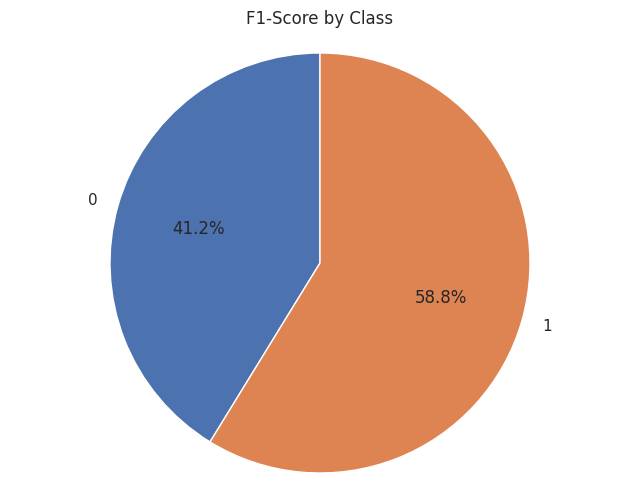

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have your true labels in y_test and predicted labels in test_pred_mnb

# Generate classification report
report = classification_report(y_test, test_pred_mnb, output_dict=True)

# Extract relevant metrics
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision_scores = [report[class_name]['precision'] for class_name in class_names]
recall_scores = [report[class_name]['recall'] for class_name in class_names]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Create a pie chart to visualize the F1 scores
plt.figure(figsize=(8, 6))
plt.pie(f1_scores, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('F1-Score by Class')
plt.show()

# 2. Support Vector Machines Classifier Algorithm

In [ ]:
from sklearn.svm import SVC
SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')
model_svm=SVM.fit(x_train_s,y_train_s)

train_pred_svm=model_svm.predict(x_train_s)
accuracy_train_svm=np.mean(train_pred_svm==y_train_s)
print('accuracy_train_svm:',accuracy_train_svm)

test_pred_svm=model_svm.predict(x_test)
accuracy_test_svm=np.mean(test_pred_svm==y_test)
print('accuracy_test_svm:',accuracy_test_svm)

accuracy_train_svm: 0.9983224603914259
accuracy_test_svm: 0.9831012572664594


In [ ]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       478
           1       0.99      0.99      0.99      6919

    accuracy                           0.98      7397
   macro avg       0.95      0.91      0.93      7397
weighted avg       0.98      0.98      0.98      7397



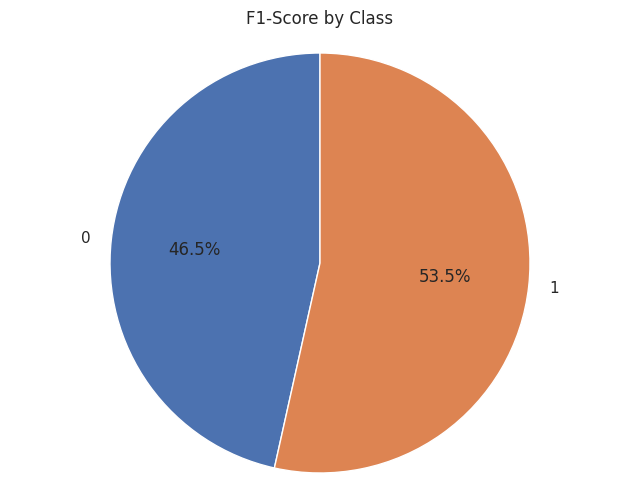

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have your true labels in y_test and predicted labels in test_pred_svm

# Generate classification report
report = classification_report(y_test, test_pred_svm, output_dict=True)

# Extract relevant metrics
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision_scores = [report[class_name]['precision'] for class_name in class_names]
recall_scores = [report[class_name]['recall'] for class_name in class_names]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Create a pie chart to visualize the F1 scores
plt.figure(figsize=(8, 6))
plt.pie(f1_scores, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('F1-Score by Class')
plt.show()


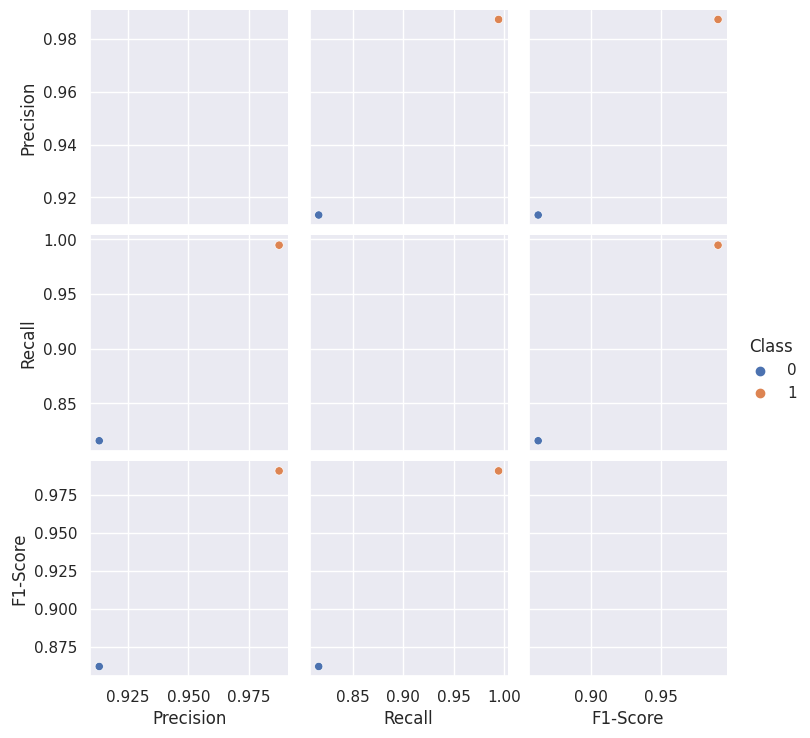

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming you have your true labels in y_test and predicted labels in test_pred_svm

# Generate classification report
report = classification_report(y_test, test_pred_svm, output_dict=True)

# Extract relevant metrics
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision_scores = [report[class_name]['precision'] for class_name in class_names]
recall_scores = [report[class_name]['recall'] for class_name in class_names]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Create a dictionary of the metrics
metrics = {
    'Class': class_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}

# Create a DataFrame from the metrics
df = pd.DataFrame(metrics)

# Use pairplot to visualize the metrics
sns.pairplot(df, hue='Class', vars=['Precision', 'Recall', 'F1-Score'])
plt.show()


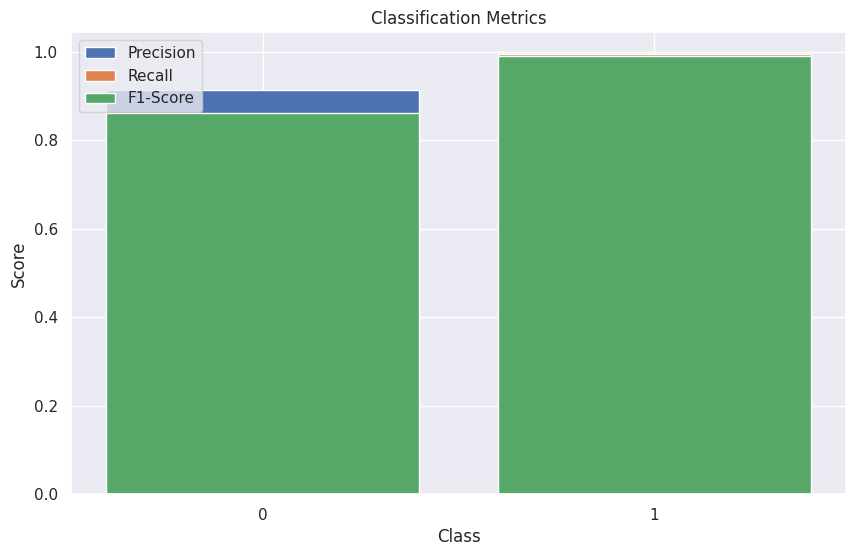

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have your true labels in y_test and predicted labels in test_pred_svm

# Generate classification report
report = classification_report(y_test, test_pred_svm, output_dict=True)

# Extract relevant metrics
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision_scores = [report[class_name]['precision'] for class_name in class_names]
recall_scores = [report[class_name]['recall'] for class_name in class_names]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Plot the metrics using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, precision_scores, label='Precision')
plt.bar(class_names, recall_scores, label='Recall')
plt.bar(class_names, f1_scores, label='F1-Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Metrics')
plt.legend()
plt.show()


In [ ]:
pip install joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib
from sklearn import svm


In [ ]:
model = svm.SVC()
# Train or fit the model on your data


In [ ]:
joblib.dump(model, 'svm_model.pkl')


['svm_model.pkl']

In [ ]:
loaded_model = joblib.load('svm_model.pkl')


# 3. Logistic Regression Classifier Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

model_log=log.fit(x_train_s,y_train_s)

train_pred_log=model_log.predict(x_train_s)
accuracy_train_log=np.mean(train_pred_log==y_train_s)
print('accuracy_train_log:',accuracy_train_log)

test_pred_log=model_log.predict(x_test)
accuracy_test_log=np.mean(test_pred_log==y_test)
print('accuracy_test_log:',accuracy_test_log)

accuracy_train_log: 0.9949673811742777
accuracy_test_log: 0.9813437880221711


In [ ]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_log))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       478
           1       0.99      0.99      0.99      6919

    accuracy                           0.98      7397
   macro avg       0.92      0.93      0.92      7397
weighted avg       0.98      0.98      0.98      7397



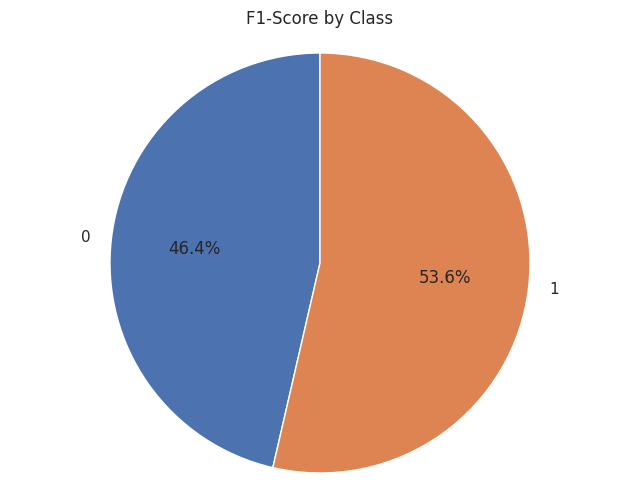

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have your true labels in y_test and predicted labels in test_pred_log

# Generate classification report
report = classification_report(y_test, test_pred_log, output_dict=True)

# Extract relevant metrics
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision_scores = [report[class_name]['precision'] for class_name in class_names]
recall_scores = [report[class_name]['recall'] for class_name in class_names]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Create a pie chart to visualize the F1 scores
plt.figure(figsize=(8, 6))
plt.pie(f1_scores, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('F1-Score by Class')
plt.show()


# 4. Decision Tree Classifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

model_dtc=model_gini.fit(x_train_s,y_train_s)
train_pred_dtc=model_dtc.predict(x_train_s)
accuracy_train_dtc=np.mean(train_pred_dtc==y_train_s)
print('accuracy_train_dtc:',accuracy_train_dtc)

test_pred_dtc=model_dtc.predict(x_test)
accuracy_test_dtc=np.mean(test_pred_dtc==y_test)
print('accuracy_test_dtc:',accuracy_test_dtc)

accuracy_train_dtc: 0.6562907735321528
accuracy_test_dtc: 0.4162498310125727


In [ ]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.09      0.91      0.17       478
           1       0.98      0.38      0.55      6919

    accuracy                           0.42      7397
   macro avg       0.54      0.65      0.36      7397
weighted avg       0.93      0.42      0.53      7397



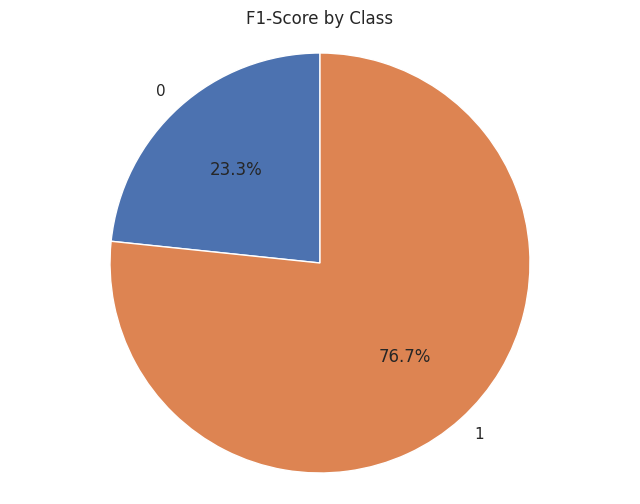

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have your true labels in y_test and predicted labels in test_pred_dtc

# Generate classification report
report = classification_report(y_test, test_pred_dtc, output_dict=True)

# Extract relevant metrics
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision_scores = [report[class_name]['precision'] for class_name in class_names]
recall_scores = [report[class_name]['recall'] for class_name in class_names]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Create a pie chart to visualize the F1 scores
plt.figure(figsize=(8, 6))
plt.pie(f1_scores, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('F1-Score by Class')
plt.show()


# 5. Random Forest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
num_trees=55 # default max trees=100
model=RandomForestClassifier(n_estimators=num_trees,max_features=2,random_state=0)

model_rfc=model.fit(x_train_s,y_train_s)
train_pred_rfc=model_rfc.predict(x_train_s)
accuracy_train_rfc=np.mean(train_pred_rfc==y_train_s)
print('accuracy_train_rfc:',accuracy_train_rfc)

test_pred_rfc=model_rfc.predict(x_test)
accuracy_test_rfc=np.mean(test_pred_rfc==y_test)
print('accuracy_test_rfc:',accuracy_test_rfc)

accuracy_train_rfc: 0.9999689344516931
accuracy_test_rfc: 0.9586318777882925


In [ ]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.37      0.53       478
           1       0.96      1.00      0.98      6919

    accuracy                           0.96      7397
   macro avg       0.97      0.68      0.76      7397
weighted avg       0.96      0.96      0.95      7397



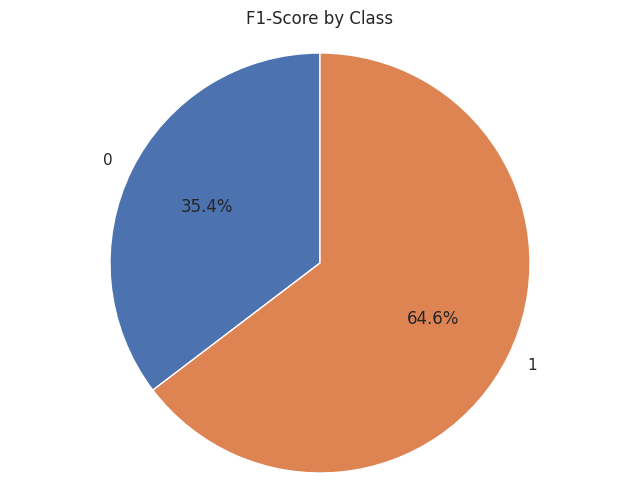

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have your true labels in y_test and predicted labels in test_pred_rfc

# Generate classification report
report = classification_report(y_test, test_pred_rfc, output_dict=True)

# Extract relevant metrics
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision_scores = [report[class_name]['precision'] for class_name in class_names]
recall_scores = [report[class_name]['recall'] for class_name in class_names]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Create a pie chart to visualize the F1 scores
plt.figure(figsize=(8, 6))
plt.pie(f1_scores, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('F1-Score by Class')
plt.show()

##6.AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(max_depth=3)

adaboost = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=2)

adaboost.fit(x_train, y_train)

train_pred_adaboost = adaboost.predict(x_train)

accuracy_train_adaboost = np.mean(train_pred_adaboost == y_train)
print('Training Accuracy:', accuracy_train_adaboost)

test_pred_adaboost = adaboost.predict(x_test)

accuracy_test_adaboost = np.mean(test_pred_adaboost == y_test)
print('Test Accuracy:', accuracy_test_adaboost)


Training Accuracy: 0.9904397705544933
Test Accuracy: 0.9718804920913884


In [ ]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_adaboost))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76       478
           1       0.98      0.99      0.99      6919

    accuracy                           0.97      7397
   macro avg       0.91      0.85      0.87      7397
weighted avg       0.97      0.97      0.97      7397



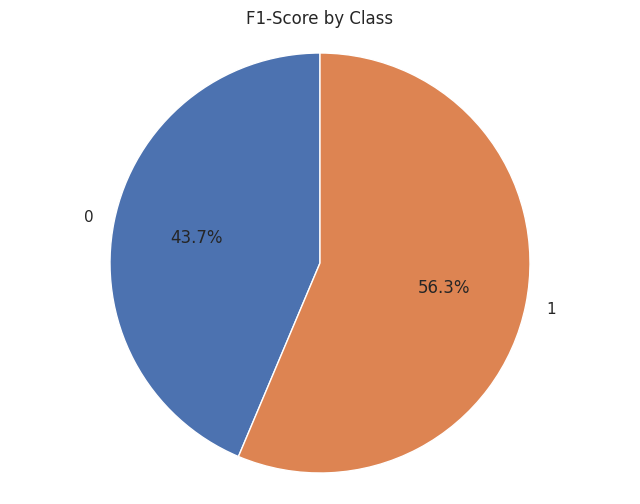

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have your true labels in y_test and predicted labels in test_pred_adaboost

# Generate classification report
report = classification_report(y_test, test_pred_adaboost, output_dict=True)

# Extract relevant metrics
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision_scores = [report[class_name]['precision'] for class_name in class_names]
recall_scores = [report[class_name]['recall'] for class_name in class_names]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Create a pie chart to visualize the F1 scores
plt.figure(figsize=(8, 6))
plt.pie(f1_scores, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('F1-Score by Class')
plt.show()

#7.Extra trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Create an instance of the ExtraTreesClassifier model
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
etc.fit(x_train, y_train)

# Make predictions on the training set
train_pred_etc = etc.predict(x_train)

# Calculate the training accuracy
accuracy_train_etc = np.mean(train_pred_etc == y_train)
print('Training Accuracy:', accuracy_train_etc)

# Make predictions on the test set
test_pred_etc = etc.predict(x_test)

# Calculate the test accuracy
accuracy_test_etc = np.mean(test_pred_etc == y_test)
print('Test Accuracy:', accuracy_test_etc)


Training Accuracy: 0.9999420592154817
Test Accuracy: 0.9728268216844667


In [ ]:
print(classification_report(y_test,test_pred_etc))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74       478
           1       0.97      1.00      0.99      6919

    accuracy                           0.97      7397
   macro avg       0.98      0.79      0.86      7397
weighted avg       0.97      0.97      0.97      7397



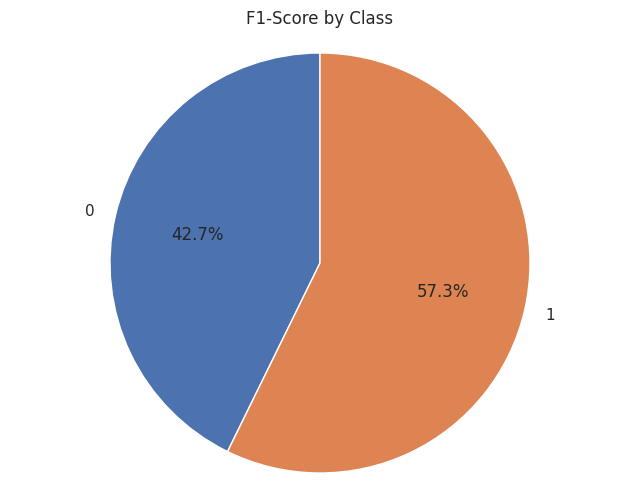

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have your true labels in y_test and predicted labels in test_pred_etc

# Generate classification report
report = classification_report(y_test, test_pred_etc, output_dict=True)

# Extract relevant metrics
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision_scores = [report[class_name]['precision'] for class_name in class_names]
recall_scores = [report[class_name]['recall'] for class_name in class_names]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Create a pie chart to visualize the F1 scores
plt.figure(figsize=(8, 6))
plt.pie(f1_scores, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('F1-Score by Class')
plt.show()

##8.gradientboosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of the ExtraTreesClassifier model
gb = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
gb.fit(x_train, y_train)

# Make predictions on the training set
train_pred_gb = gb.predict(x_train)

# Calculate the training accuracy
accuracy_train_gb = np.mean(train_pred_gb == y_train)
print('Training Accuracy:', accuracy_train_gb)

# Make predictions on the test set
test_pred_gb = gb.predict(x_test)

# Calculate the test accuracy
accuracy_test_gb = np.mean(test_pred_gb == y_test)
print('Test Accuracy:', accuracy_test_gb)

Training Accuracy: 0.9999420592154817
Test Accuracy: 0.9728268216844667


In [ ]:
print(classification_report(y_test,test_pred_gb))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74       478
           1       0.97      1.00      0.99      6919

    accuracy                           0.97      7397
   macro avg       0.98      0.79      0.86      7397
weighted avg       0.97      0.97      0.97      7397



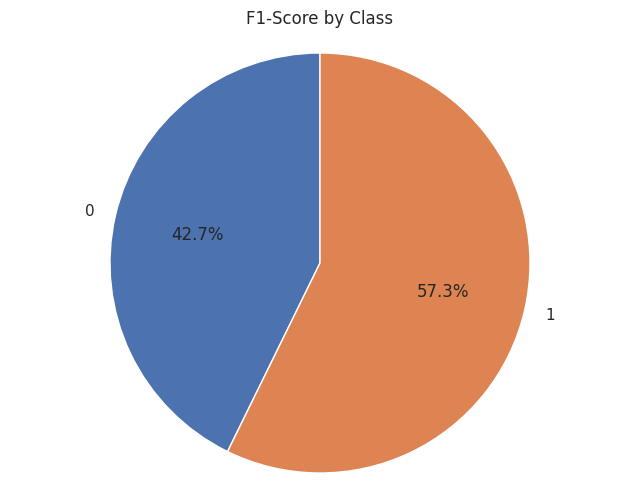

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have your true labels in y_test and predicted labels in test_pred_gb

# Generate classification report
report = classification_report(y_test, test_pred_gb, output_dict=True)

# Extract relevant metrics
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision_scores = [report[class_name]['precision'] for class_name in class_names]
recall_scores = [report[class_name]['recall'] for class_name in class_names]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Create a pie chart to visualize the F1 scores
plt.figure(figsize=(8, 6))
plt.pie(f1_scores, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('F1-Score by Class')
plt.show()

# Compare Results

In [ ]:
data={'Model':pd.Series(['Multinomial_NBC','SVM_SVC','Logistic_Reg_C','Decision_Tree_C','Random_Forest_C','AdaBoost','ExtraTreeClassifier','GradientBoosting']),
    'Train Accuracy' : pd.Series([accuracy_train_mnb,accuracy_train_svm,accuracy_train_log,accuracy_train_dtc,accuracy_train_rfc,accuracy_train_adaboost,accuracy_train_etc,accuracy_train_gb]),
    'Test Accuracy':pd.Series([accuracy_test_mnb,accuracy_test_svm,accuracy_test_log,accuracy_test_dtc,accuracy_test_rfc,accuracy_test_adaboost,accuracy_test_etc,accuracy_test_gb])}
accuracy_table=pd.DataFrame(data)
accuracy_table.sort_values('Test Accuracy',ascending=False).reset_index(drop=True)

,Model,Train Accuracy,Test Accuracy
0,SVM_SVC,0.998322,0.983101
1,Logistic_Reg_C,0.994967,0.981344
2,ExtraTreeClassifier,0.999942,0.972827
3,GradientBoosting,0.999942,0.972827
4,AdaBoost,0.990440,0.971880
5,Random_Forest_C,0.999969,0.958632
6,Multinomial_NBC,0.967878,0.947546
7,Decision_Tree_C,0.656291,0.416250


# Model Deployment

In [ ]:
# testing with text
str_sentence='how are you all... Hope to see u soon and study together'
sentence = pd.DataFrame({'content':str_sentence},index=[0])
sentence=sentence.astype('U')
sentence

,content
0,how are you all... Hope to see u soon and stud...


In [ ]:
def pre_process():

    def clean_text(text):
        '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
        text=text.lower()
        text=re.sub('\[.*?\]',' ',text)
        text=re.sub('[%s]'% re.escape(string.punctuation),' ',text)
        text=re.sub('\w*\d\w*',' ',text)
        text=re.sub('[0-9' ']+',' ',text)
        text=re.sub('[''""…]', ' ', text)
        text=re.sub('[\n]', ' ', text)
        text=re.sub('[\s]', ' ', text)
        return text

    clean = lambda x: clean_text(x) 

In [ ]:
sentence['content']=sentence['content'].apply(clean)
sentence['content']

0    how are you all    hope to see u soon and stud...
Name: content, dtype: object

In [ ]:
stop_words = set(stopwords.words('english') + ['excelr', 'ect', 'com', 'hou', 'cc', 'td', 'http', 'www', 'font', 'original', 'message','subject', 'fw'])
sentence['content'] = sentence['content'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))
sentence['content']

0    hope see u soon study together
Name: content, dtype: object

In [ ]:
# Lemmatization

In [ ]:
estrip = [content.strip() for content in sentence.content] # remove both the leading and the trailing characters
estrip = [content for content in estrip if content] # removes empty strings, because they are considered in Python as False
estrip[0:10]

['hope see u soon study together']

In [ ]:
# Joining the list into one string/text
estrip_text=' '.join(estrip)
estrip_text

'hope see u soon study together'

In [ ]:
#Punctuation
no_punc_text = estrip_text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'hope see u soon study together'

In [ ]:
#Tokenization
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['hope', 'see', 'u', 'soon', 'study', 'together']


In [ ]:
len(text_tokens)

6

In [ ]:
# NLP english language model of spacy library
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(text_tokens))
print(doc)

hope see u soon study together


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['hope', 'see', 'u', 'soon', 'study', 'together']


In [ ]:
all_emails_matrix_sent=email_bow.transform(lemmas)
all_emails_matrix_sent.shape

(6, 85984)

In [ ]:
tfidf_transformer_sent=TfidfTransformer().fit(all_emails_matrix_sent)

In [ ]:
all_emails_tfidf_sent=tfidf_transformer_sent.transform(all_emails_matrix_sent)
all_emails_tfidf_sent.shape

(6, 85984)

In [ ]:
prediction=model_svm.predict(all_emails_tfidf_sent)
result=prediction.all()
result

True

In [ ]:
if result==False:
    print('This is a Abusive Email')
else:
    print('This is a Non Abusive Email')

This is a Non Abusive Email


In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression

# Assuming you have a trained SVM model object called 'svm_model'
# Save the model to a file
with open('model_svm.pkl', 'wb') as file:
    pickle.dump(model_svm, file)


In [ ]:
import pickle

# Load the model from file
with open('model_svm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
